In [67]:
lol = {'visualization': [], 'predictions': [[{'keypoints': [[-0.0, 0.0, 0.8179692625999451], [0.040941040962934494, -0.1594102680683136, 0.8124692440032959], [-0.32493409514427185, -0.1813235878944397, 0.45961013436317444], [-0.2178007811307907, 0.0032552299089729786, 0.0], [-0.03069116175174713, 0.14929278194904327, 0.8236818909645081], [-0.3356389105319977, 0.27307724952697754, 0.47536134719848633], [-0.24962621927261353, 0.29814285039901733, 0.028932154178619385], [-0.2624133229255676, -0.038346219807863235, 0.9701371192932129], [-0.5357133746147156, -0.07428498566150665, 1.126444697380066], [-0.8047424554824829, -0.10607752203941345, 1.1905708312988281], [-0.8098866939544678, -0.11865619570016861, 1.2469738721847534], [-0.5398093461990356, 0.08987322449684143, 1.1279150247573853], [-0.6351518630981445, 0.13341031968593597, 0.7801660299301147], [-0.8164509534835815, 0.15955890715122223, 0.5260588526725769], [-0.5201144814491272, -0.24108636379241943, 1.1241424083709717], [-0.6209665536880493, -0.24187767505645752, 0.7656158804893494], [-0.825140118598938, -0.1752726286649704, 0.5066332817077637]], 'keypoint_scores': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}]]}
rula_girl = {'visualization': [], 'predictions': [[{'keypoints': [[-0.0, 0.0, 0.6517458558082581], [0.07614172250032425, -0.1081618219614029, 0.6364327669143677], [0.049782346934080124, -0.0027257998008280993, 0.23980078101158142], [0.3146137595176697, 0.1263187825679779, 0.0], [-0.07397143542766571, 0.10070735216140747, 0.6663017868995667], [-0.24149340391159058, -0.03839167580008507, 0.33746349811553955], [-0.03865673765540123, 0.1364823430776596, 0.0161399245262146], [0.09974963217973709, 0.0024693498853594065, 0.8867586851119995], [0.19880396127700806, -0.03764152526855469, 1.1275575160980225], [0.18450647592544556, -0.09529012441635132, 1.3223800659179688], [0.21238988637924194, -0.05458226427435875, 1.3646093606948853], [0.10509240627288818, 0.0737433061003685, 1.1617043018341064], [-0.05830639600753784, 0.17740324139595032, 0.958266019821167], [-0.2155175805091858, 0.1719728261232376, 0.8138850331306458], [0.27859044075012207, -0.1607668250799179, 1.0724601745605469], [0.10511450469493866, -0.25507527589797974, 0.8391019105911255], [-0.13905346393585205, -0.1771010309457779, 0.766766369342804]], 'keypoint_scores': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}]]}
lol['predictions'][0][0]['keypoints']

[[-0.0, 0.0, 0.8179692625999451],
 [0.040941040962934494, -0.1594102680683136, 0.8124692440032959],
 [-0.32493409514427185, -0.1813235878944397, 0.45961013436317444],
 [-0.2178007811307907, 0.0032552299089729786, 0.0],
 [-0.03069116175174713, 0.14929278194904327, 0.8236818909645081],
 [-0.3356389105319977, 0.27307724952697754, 0.47536134719848633],
 [-0.24962621927261353, 0.29814285039901733, 0.028932154178619385],
 [-0.2624133229255676, -0.038346219807863235, 0.9701371192932129],
 [-0.5357133746147156, -0.07428498566150665, 1.126444697380066],
 [-0.8047424554824829, -0.10607752203941345, 1.1905708312988281],
 [-0.8098866939544678, -0.11865619570016861, 1.2469738721847534],
 [-0.5398093461990356, 0.08987322449684143, 1.1279150247573853],
 [-0.6351518630981445, 0.13341031968593597, 0.7801660299301147],
 [-0.8164509534835815, 0.15955890715122223, 0.5260588526725769],
 [-0.5201144814491272, -0.24108636379241943, 1.1241424083709717],
 [-0.6209665536880493, -0.24187767505645752, 0.765615880

## Anslysis

In [68]:
keypoints_names = [
    'bottom_torso',  # 0
    'left_hip',      # 1
    'left_knee',     # 2
    'left_foot',     # 3
    'right_hip',     # 4
    'right_knee',    # 5
    'right_foot',    # 6
    'center_torso',  # 7
    'upper_torso',   # 8
    'neck_base',     # 9
    'center_head',   # 10
    'right_shoulder',# 11
    'right_elbow',   # 12
    'right_hand',    # 13
    'left_shoulder', # 14
    'left_elbow',    # 15
    'left_hand'      # 16
]

In [69]:
import plotly.graph_objects as go
import numpy as np

# Extract keypoints
keypoints = rula_girl['predictions'][0][0]['keypoints']
keypoints = np.array(keypoints)

# Define the connections for the skeleton
# Each tuple represents (start_point_idx, end_point_idx)
skeleton_connections = [
    # Torso
    (0, 7),  # bottom_torso to center_torso
    (7, 8),  # center_torso to upper_torso
    (8, 9),  # upper_torso to neck_base
    (9, 10), # neck_base to center_head
    
    # Left leg
    (0, 1),  # bottom_torso to left_hip
    (1, 2),  # left_hip to left_knee
    (2, 3),  # left_knee to left_foot
    
    # Right leg
    (0, 4),  # bottom_torso to right_hip
    (4, 5),  # right_hip to right_knee
    (5, 6),  # right_knee to right_foot
    
    # Left arm
    (8, 14), # upper_torso to left_shoulder
    (14, 15),# left_shoulder to left_elbow
    (15, 16),# left_elbow to left_hand
    
    # Right arm
    (8, 11), # upper_torso to right_shoulder
    (11, 12),# right_shoulder to right_elbow
    (12, 13), # right_elbow to right_hand
    
]

# Create figure
fig = go.Figure()

# Add points
fig.add_trace(go.Scatter3d(
    x=keypoints[:, 0],
    y=keypoints[:, 1],
    z=keypoints[:, 2],
    mode='markers+text',
    marker=dict(
        size=8,
        color=z,
        colorscale='Viridis',
        showscale=True
    ),
    text=[f'({keypoints_names[i]})' for i, name in enumerate(keypoints)],
    hovertemplate='<b>%{text}</b><br>' +
                  'x: %{x:.3f}<br>' +
                  'y: %{y:.3f}<br>' +
                  'z: %{z:.3f}<br>'
                  ,
    name='Keypoints'
))

# Add lines for skeleton
for connection in skeleton_connections:
    start_idx, end_idx = connection
    fig.add_trace(go.Scatter3d(
        x=[keypoints[start_idx][0], keypoints[end_idx][0]],
        y=[keypoints[start_idx][1], keypoints[end_idx][1]],
        z=[keypoints[start_idx][2], keypoints[end_idx][2]],
        mode='lines',
        line=dict(color='gray', width=2),
        hoverinfo='skip',
        showlegend=False
    ))

# Update layout
fig.update_layout(
    title='3D Pose Keypoints with Skeleton',
    scene=dict(
        xaxis_title = 'X',#'X',
        yaxis_title = 'Y',#'Z',
        zaxis_title = 'Z',#'Y',
        aspectmode='data'
    ),
    width=800,
    height=800
)

# Show the plot
fig.show()

### Calculate Angle in 3d (angles between vectors)

#### 1. Side Angle of center_torso, upper_torso, right_elbow


In [74]:
# Get the coordinates of the keypoints
center_torso_coords = keypoints[keypoints_names.index('center_torso')].copy()
upper_torso_coords = keypoints[keypoints_names.index('upper_torso')].copy()
right_elbow_coords = keypoints[keypoints_names.index('right_elbow')].copy()

# Equalize their Depth coordinate (y-coordinates)
# center_torso_coords[1] = upper_torso_coords[1] = right_elbow_coords[1] = 0

center_torso_coords

array([0.09974963, 0.00246935, 0.88675869])

In [75]:
# Calculate the angle between the vectors where both vectors have center_torso as the common point

def calculate_angle_between_vectors(vector1, vector2):
    # Calculate the dot product
    dot_product = np.dot(vector1, vector2)
    
    # Calculate the magnitudes
    magnitude_vector1 = np.linalg.norm(vector1)
    magnitude_vector2 = np.linalg.norm(vector2)
    
    # Calculate the angle in radians
    angle_radians = np.arccos(dot_product / (magnitude_vector1 * magnitude_vector2))
    
    # Convert the angle to degrees
    angle_degrees = np.degrees(angle_radians)
    
    return angle_degrees

common_point = center_torso_coords
vector1 = upper_torso_coords - common_point
vector2 = right_elbow_coords - common_point

calculate_angle_between_vectors(vector1, vector2)

94.82028538877174

#### 2. Side Angle of left_elbow, upper_torso, right_elbow


In [66]:
# Get the coordinates of the keypoints
left_elbow_coords = keypoints[keypoints_names.index('left_elbow')].copy()
upper_torso_coords = keypoints[keypoints_names.index('upper_torso')].copy()
right_elbow_coords = keypoints[keypoints_names.index('right_elbow')].copy()

# Equalize their Depth coordinate (y-coordinates)
upper_torso_coords[1] = left_elbow_coords[1] = right_elbow_coords[1] = 0

common_point = upper_torso_coords
vector1 = left_elbow_coords - common_point
vector2 = right_elbow_coords - common_point

calculate_angle_between_vectors(vector1, vector2)

2.7286051252314834

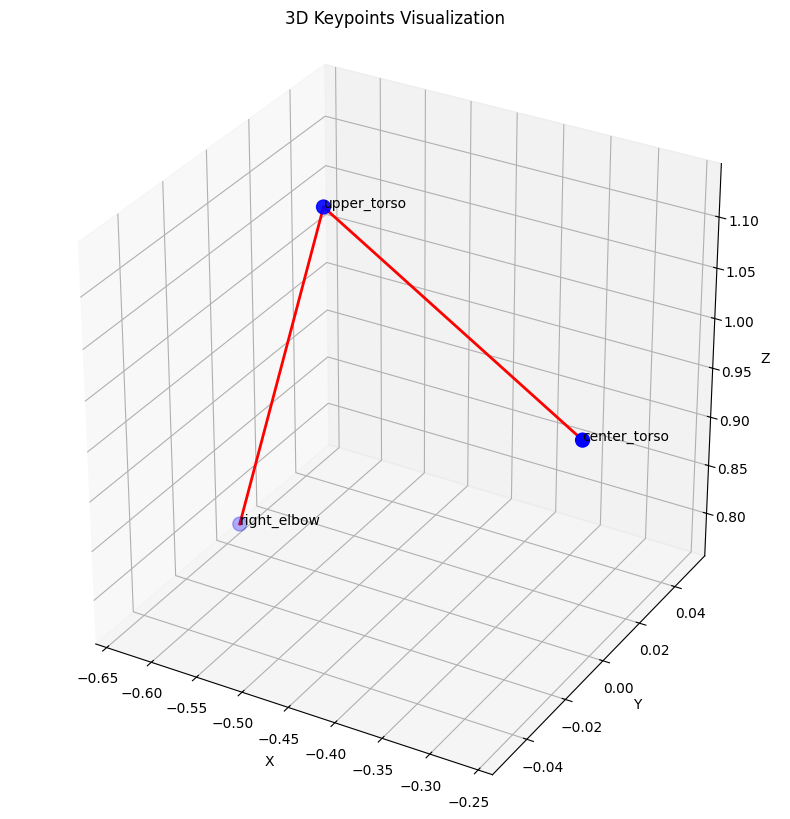

In [45]:
# import sys
# sys.path.append("..") # Adds parent directory to Python path
# from src.utils.utils import visualize_3d_keypoints
# # Example usage:
# points = [
#     center_torso_coords,
#     upper_torso_coords,
#     right_elbow_coords
# ]

# labels = ['center_torso', 'upper_torso', 'right_elbow']

# visualize_3d_keypoints(points, labels)